In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("AirQualityUCI.csv")

#### from the available data null values are named as -200  i am replacing -200 to none value

### column wise missing values count

In [33]:
df=df.replace({-200: None})
df.isnull().sum()

Date                0
Time                0
CO(GT)           1682
PT08.S1(CO)       367
NMHC(GT)         8442
C6H6(GT)          366
PT08.S2(NMHC)     367
NOx(GT)          1638
PT08.S3(NOx)      367
NO2(GT)          1641
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                367
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7675 non-null object
PT08.S1(CO)      8990 non-null object
NMHC(GT)         915 non-null object
C6H6(GT)         8991 non-null object
PT08.S2(NMHC)    8990 non-null object
NOx(GT)          7719 non-null object
PT08.S3(NOx)     8990 non-null object
NO2(GT)          7716 non-null object
PT08.S4(NO2)     8991 non-null object
PT08.S5(O3)      8991 non-null object
T                8991 non-null object
RH               8991 non-null object
AH               8990 non-null object
dtypes: object(15)
memory usage: 1.1+ MB


In [35]:
df.shape

(9357, 15)

### row wise missing values count

In [36]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       2
10      1
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9327    1
9328    1
9329    1
9330    1
9331    1
9332    1
9333    1
9334    1
9335    1
9336    1
9337    1
9338    1
9339    1
9340    1
9341    1
9342    1
9343    1
9344    1
9345    1
9346    2
9347    1
9348    1
9349    1
9350    1
9351    1
9352    1
9353    1
9354    1
9355    1
9356    1
Length: 9357, dtype: int64

 #### thier are lot of missing values in the data  we can see, first we need to handle the missing values based on the following steps

In [37]:
### CALCULATE PECENTAGE OF MISSING VALUES IN COLUMN WISE
r=df.isnull().sum()*100/len(df)
r1=round(r,2)
print(r1)

Date              0.00
Time              0.00
CO(GT)           17.98
PT08.S1(CO)       3.92
NMHC(GT)         90.22
C6H6(GT)          3.91
PT08.S2(NMHC)     3.92
NOx(GT)          17.51
PT08.S3(NOx)      3.92
NO2(GT)          17.54
PT08.S4(NO2)      3.91
PT08.S5(O3)       3.91
T                 3.91
RH                3.91
AH                3.92
dtype: float64


### the attribute name NMHC(GT) - (titania) hourly averaged sensor response (nominally NMHC targeted) contain 90% of missing values thier is no use of these column drop it


In [38]:
df=df.drop(columns=["NMHC(GT)"])


### droping uncessary rows
### Some of the rows might have greater than seven NaN values. Such rows aren't of much use for the analysis and hence, should be removed.

### storing new dataframe in df1 varaible


In [39]:
k=df.isnull().sum(axis=1)
c=k.keys()
l=list(filter(lambda x:k[x]>7,c))
df1=df.drop(l,axis=0)

In [40]:
df1.isnull().sum()

Date                0
Time                0
CO(GT)           1646
PT08.S1(CO)         1
C6H6(GT)            0
PT08.S2(NMHC)       1
NOx(GT)          1594
PT08.S3(NOx)        1
NO2(GT)          1597
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  1
dtype: int64

### After removing row that had null values with greater than seven thier are still missing values in data

#### for this i am going to visualze the columns and fill the null values with thier means

In [41]:
l=["CO(GT)","NOx(GT)","NO2(GT)","PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","AH"]

In [42]:
for i in range(len(l)):
    
    df1[l[i]]=df1[l[i]].fillna(df1[l[i]].mean())


In [43]:
df1.isnull().sum()


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [44]:
df1.shape

(8991, 14)

Most values are lies between 150 and 280 mean value lies in 248 and thier are some outliers


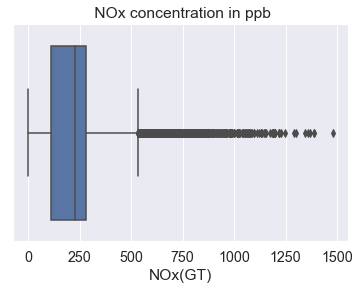

In [45]:
plt.title(" NOx concentration in ppb")
sns.set(font_scale=(1.3))
sns.boxplot(df1["NOx(GT)"])
print("Most values are lies between 150 and 280 mean value lies in 248 and thier are some outliers")


Most values are lies between 80 and 130 mean value lies in 113 and thier are less number of outliers


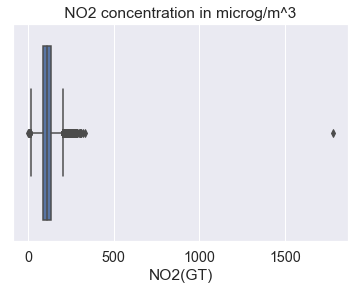

In [46]:
sns.set(font_scale=(1.3))
plt.title(" NO2 concentration in microg/m^3 ")
sns.boxplot(df1["NO2(GT)"])
print("Most values are lies between 80 and 130 mean value lies in 113 and thier are less number of outliers")

Most values are lies between 750 and 1200 mean value lies in 940 and thier are less number of outliers


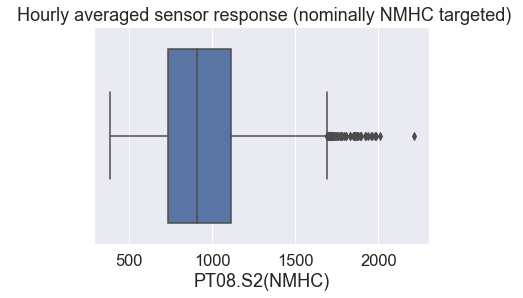

In [47]:
sns.set(font_scale=(1.5))
plt.title("  Hourly averaged sensor response (nominally NMHC targeted) ")
sns.boxplot(df1["PT08.S2(NMHC)"])
print("Most values are lies between 750 and 1200 mean value lies in 940 and thier are less number of outliers")

In [48]:
df1.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692,1268,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559,972,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402.0,9,939.0,131.0,1140.0,114.0,1555,1074,11.9,54,0.7502
3,10/3/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584,1203,11,60,0.7867
4,10/3/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490,1110,11.2,59.6,0.7888


## Correlation between each column

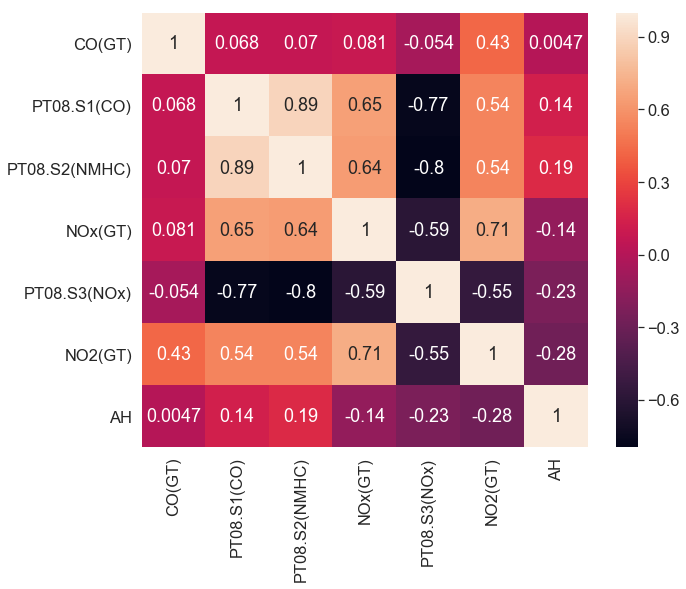

In [51]:
corr=df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

### After removing or filling all the null values we have look how the data set is  and their is know use of date column drop it. 

In [52]:
df1.drop(columns=["Date"],inplace=True)

In [53]:
df1.head()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692,1268,13.6,48.9,0.7578
1,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559,972,13.3,47.7,0.7255
2,20.00.00,2.2,1402.0,9,939.0,131.0,1140.0,114.0,1555,1074,11.9,54,0.7502
3,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584,1203,11,60,0.7867
4,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490,1110,11.2,59.6,0.7888


### Machine learing algorithms doesn't accept any string or date time values the data must be in float or numerical data

### set time as index

In [54]:
df1=df1.set_index('Time')
df1.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Time,,,,,,,,,,,,
18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692,1268,13.6,48.9,0.7578
19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559,972,13.3,47.7,0.7255
20.00.00,2.2,1402.0,9,939.0,131.0,1140.0,114.0,1555,1074,11.9,54,0.7502
21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584,1203,11,60,0.7867
22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490,1110,11.2,59.6,0.7888


### Allocating the attribues and the labels for the data

In [55]:
X = df1.iloc[:, :-2]
y = df1.iloc[:, -2]

### Training, testing and spliting the data

In [56]:
from sklearn.model_selection import train_test_split#splitting our data into the parts like train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#we are giving X-->Features, Y--> Labels
#Test size refers to the how much should be the data for the test and the train
#random state takes data randomly if we gaiven any number like 10, 20 or if you 0 it will take data in sequence way

### Scaling data from 0 to 1

In [57]:
from sklearn.preprocessing import StandardScaler#standard scaler the function is used to bring different range data into same range
sc = StandardScaler()#this function creating the variable
X_train = sc.fit_transform(X_train)#fitting into the standard scaler for train data
X_test = sc.transform(X_test)#fitting for the test data

### for this data set i am using random forest regression for best accuray

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)#This the function for the randomforest regression which was family from the randomforest
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
y_pred = rfr.predict(X_test)

### finding error using mean_squared_log_error

In [60]:
from sklearn.metrics import mean_squared_log_error
s = mean_squared_log_error(y_test, y_pred)

### Accuracy of the model

In [61]:
accuracy = 1 - s
accuracy

0.9839100306448124

### ploting the predicted values and test values

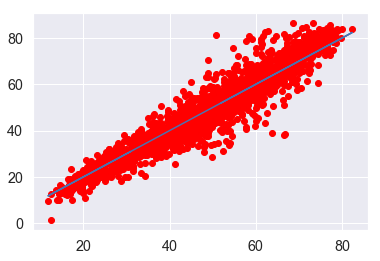

In [62]:
sns.set(font_scale=(1.3))
plt.scatter(y_pred, y_test, c = 'red')
plt.plot(rfr.predict(X_test), y_pred, c = 'b')
plt.show()

## grid search

In [38]:
from sklearn.model_selection import GridSearchCV #Grid search cv is the FUNCTION FROM THE MODEL SELECTION CLASS

### Tuning the with help of the Grid search

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)# n_estimator allocate number of trees sholud for the data
parameter={ 'criterion':['mse'],#Criterion of the model
    'max_depth' : [1, 2,5,8,10,13],#max_depth for the model
    'random_state' : [0, 6]}#random state takes data randomly if we gaiven any number like 10, 20 or 
    #if you 0 it will take data in sequence way

### Passing into the model to find the best parameter from the model

In [40]:
grid_search = GridSearchCV(estimator=rfr, 
                          param_grid=parameter,
                          cv=5)

### fitting the data into model

In [41]:
grid_search.fit(X_train, y_train) #fitting the data into the model for the training

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse'], 'max_depth': [1, 2, 5, 8, 10, 13], 'random_state': [0, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid_search.best_estimator_ #it will give best estimators from the given parameters on the data

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [43]:
grid_search.best_score_# it will give predict the score for the test

0.8796117236467609

## Hypothesis Testing
#### Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.
Ex : you say avg student in class is 40 or a boy is taller than girls.

### parameter of hypothesis testing:

#### Null hypothesis :- In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups
#### In other words it is a basic assumption or made based on domain or problem knowledge.

#### Here we test the llikelihood of this statement being true in order to decide whether to accept or reject our alternative hypothesis
#### Can Include: =,>=,and <= signs

Example : a company production is = 50 unit/per day etc.


#### Alternative hypothesis :-
#### The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)

#### We determine whether or not to accept or reject these statement based on the likelihood of the null hypothesis being true
#### Can inculde: a !=,>, and < signs
Example : a company production is !=50 unit/per day etc.

(array([ 83., 192., 273., 342., 324., 324., 195.,  66.]),
 array([ 9.6   , 19.4875, 29.375 , 39.2625, 49.15  , 59.0375, 68.925 ,
        78.8125, 88.7   ]),
 <a list of 8 Patch objects>)

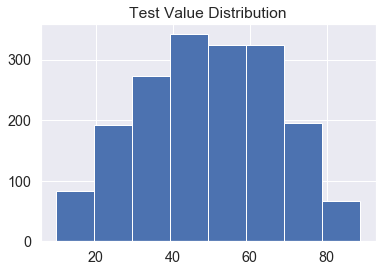

In [37]:
plt.title("Test Value Distribution")
plt.hist(y_test,8)

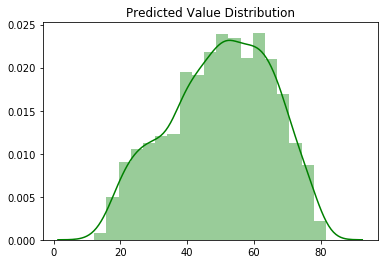

In [42]:
plt.title("Predicted Value Distribution")
sns.distplot(y_pred,kde=True,color='g')


### Z-test when you can perform Z-test
#### Your sample size is greater than 30. Otherwise, use a t test.
#### Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
#### Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
#### Your data should be randomly selected from a RH values, where each item has an equal chance of being selected.
#### Sample sizes should be equal if at all possible.

#### you can see from the above figure the data is in normal form you can apply Z-test

In [35]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(y_test, x2=None, value=156)## it will select one sample test Z-test
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


### Two-sample Z test- In two sample z-test , here we are checking two independent data groups and deciding whether sample mean of two group is equal or not.

In [37]:
ztest ,pval1 = stests.ztest(y_test, y_pred, value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.8642735010143168
reject null hypothesis


### ANOVA (F-TEST) :-The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. 
For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

In [44]:
df_anova = df1[["CO(GT)","RH"]]
grps = pd.unique(df_anova["CO(GT)"].values)
d_data = {grp:df_anova['RH'][df_anova["CO(GT)"] == grp] for grp in grps}
 
F, p = stats.f_oneway(df1["NOx(GT)"],df1["NO2(GT)"],df1["PT08.S1(CO)"])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


#### Two Way F-test :- Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

#### Chi-Square Test- The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.
For example, in an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference
### In our data set their is no categorical data it is all numerical data